### This project uses machine learning techniques to predict the likelihood of diabetes in individuals based on medical attributes from the Pima Indians Diabetes dataset. The dataset includes features such as glucose level, blood pressure, insulin, BMI, age, and more. The goal is to develop a predictive model that classifies whether a person has diabetes or not. Three models were trained and compared which were Support Vector Machine (SVM), Random Forest, and Logistic Regression where I evaluated using accuracy, precision, recall, and F1 score. The project also includes data cleaning, feature standardization, visualization of feature importance, and an analysis of diabetes prevalence across different age groups. A final predictive system was built to make real-time predictions using new patient data. This project demonstrates the practical application of data science in healthcare to support early detection and risk assessment of diabetes.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Data Collection and Analysis

In [4]:
df = pd.read_csv(r"C:\Users\hp\Desktop\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#number of rows and columns
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#we replaced the 0's in the columns with both mean and median 
for col in ['Glucose', 'BloodPressure','BMI']:
    mean_value = df[df[col] !=0][col].mean()
    df[col] = df[col].replace(0, mean_value)

for col in ['SkinThickness','Insulin']:
    mean_value = df[df[col] !=0][col].median()
    df[col] = df[col].replace(0, mean_value)

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63,0
764,2,122.0,70.0,27,125,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0
766,1,126.0,60.0,29,125,30.1,0.349,47,1


In [10]:
df.std()

Pregnancies                  3.369578
Glucose                     30.435949
BloodPressure               12.096346
SkinThickness                8.791221
Insulin                     86.383060
BMI                          6.875151
DiabetesPedigreeFunction     0.331329
Age                         11.760232
Outcome                      0.476951
dtype: float64

In [11]:
# the labels 0= non diabetic, 1 = diabetic
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,127.792000,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,164.701493,35.384757,0.550500,37.067164


in this group by we can say the people whose glucose is around 109 are non-diabetic whiles those whose are around 141 are known to be diabetic

In [14]:
#separating the data and labels
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

In [15]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35      125  33.6   
1              1     85.0           66.0             29      125  26.6   
2              8    183.0           64.0             29      125  23.3   
3              1     89.0           66.0             23       94  28.1   
4              0    137.0           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48      180  32.9   
764            2    122.0           70.0             27      125  36.8   
765            5    121.0           72.0             23      112  26.2   
766            1    126.0           60.0             29      125  30.1   
767            1     93.0           70.0             31      125  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### DATA STANDARDIZATION

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data
Y = df['Outcome']

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
X.std()

1.0

In [25]:
Y.std()

0.4769513772427971

### TRAIN TEST SPLIT

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### TRAINING THE MODEL

### SUPPORT VECTOR MACHINE

In [31]:
classifier = svm.SVC(kernel='linear')

In [32]:
#training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### MODEL EVALUATION : ACCURACY SCORE

In [34]:
X_train_prediction = classifier.predict(X_train)
svm_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
svm_training_data_accuracy

0.7785016286644951

In [36]:
X_test_prediction = classifier.predict(X_test)
svm_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
svm_test_data_accuracy

0.7727272727272727

### MAKING A PREDICTIVE SYSTEM

In [39]:
input_data = (4,110,92,0,0,37.6,0.191,30)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('This person has no diabetes')
else:
    print('This person has diabetes')

[[ 0.04601433 -0.38422915  1.62095107 -3.31319642 -1.62952723  0.74847627
  -0.84827977 -0.27575966]]
[0]
This person has no diabetes


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
input_data = (10,168,74,0,0,38,0.537,34)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('This person has no diabetes')
else:
    print('This person has diabetes')

[[ 1.82781311  1.52265398  0.13192869 -3.31319642 -1.62952723  0.80669472
   0.1966813   0.06459135]]
[1]
This person has diabetes


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_model = RandomForestClassifier()#random_state=42)

In [44]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [45]:
X_train_preds = rf_model.predict(X_train)
rf_X_train_accuracy = accuracy_score(X_train_preds, Y_train)

In [46]:
rf_X_train_accuracy

1.0

In [47]:
X_test_preds = rf_model.predict(X_test)
rf_X_test_accuracy = accuracy_score(X_test_preds, Y_test)

In [48]:
rf_X_test_accuracy

0.7467532467532467

In [49]:
from sklearn.metrics import accuracy_score

rf_X_train_accuracy = accuracy_score(Y_train, X_train_preds)
rf_X_test_accuracy = accuracy_score(Y_test, X_test_preds)

print("Training Accuracy:", rf_X_train_accuracy)
print("Test Accuracy:", rf_X_test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.7467532467532467


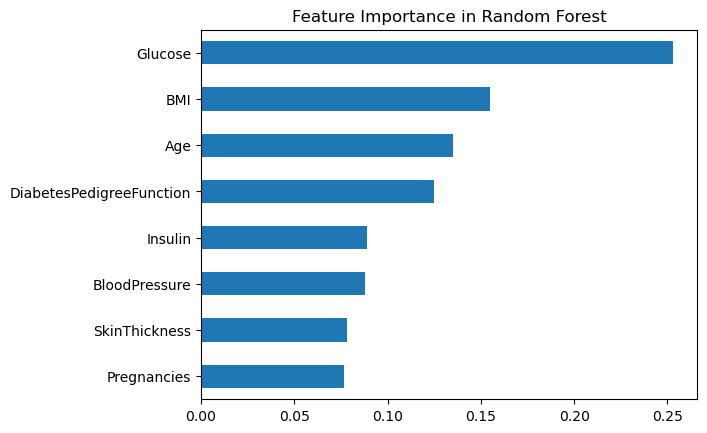

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
importances = rf_model.feature_importances_

# Visualize
pd.Series(importances, index=feature_names).sort_values().plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.show()

In [51]:
import seaborn as sns
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230941,0.281268,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


<Axes: >

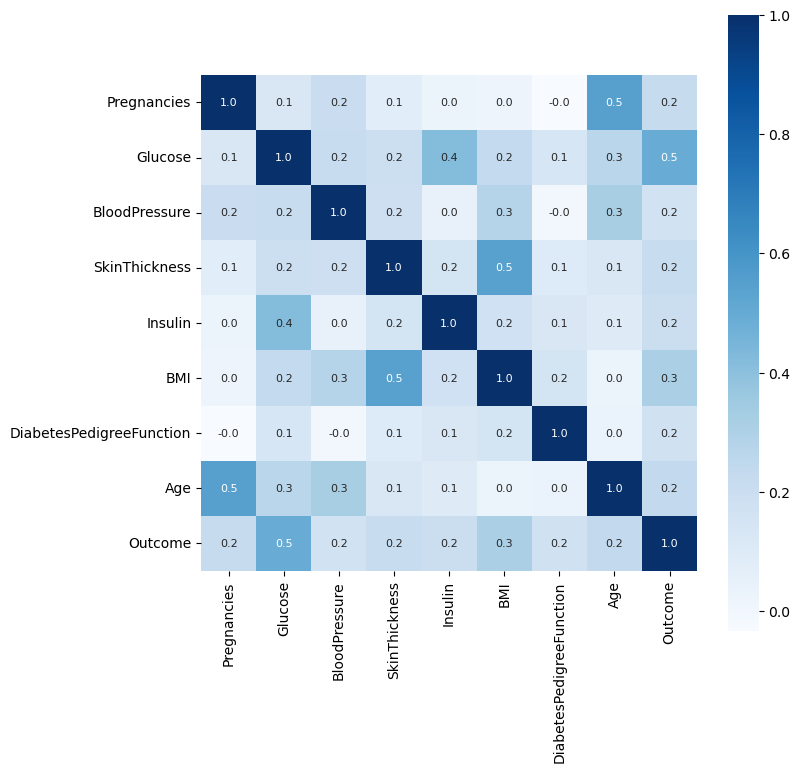

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [53]:
# Input data for a new person (must be 8 values in order)
input_data = (4,110,92,0,0,37.6,0.191,30)

# Convert to numpy array
input_data_as_array = np.asarray(input_data)

# Reshape (1 row, 8 columns)
input_data_reshaped = input_data_as_array.reshape(1, -1)

# Standardize the new data using the same scaler
std_input_data = scaler.transform(input_data_reshaped)
print("Standardized input:", std_input_data)

# Make prediction using Random Forest model
prediction = rf_model.predict(std_input_data)
print("Prediction result:", prediction)

# Interpret the result
if prediction[0] == 0:
    print("This person has no diabetes")
else:
    print("This person has diabetes")


Standardized input: [[ 0.04601433 -0.38422915  1.62095107 -3.31319642 -1.62952723  0.74847627
  -0.84827977 -0.27575966]]
Prediction result: [0]
This person has no diabetes


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
# Input data for a new person (must be 8 values in order)
input_data = (10,168,74,0,0,38,0.537,34)

# Convert to numpy array
input_data_as_array = np.asarray(input_data)

# Reshape (1 row, 8 columns)
input_data_reshaped = input_data_as_array.reshape(1, -1)

# Standardize the new data using the same scaler
std_input_data = scaler.transform(input_data_reshaped)
print("Standardized input:", std_input_data)

# Make prediction using Random Forest model
prediction = rf_model.predict(std_input_data)
print("Prediction result:", prediction)

# Interpret the result
if prediction[0] == 0:
    print("This person has no diabetes")
else:
    print("This person has diabetes")


Standardized input: [[ 1.82781311  1.52265398  0.13192869 -3.31319642 -1.62952723  0.80669472
   0.1966813   0.06459135]]
Prediction result: [1]
This person has diabetes


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model = LogisticRegression()

In [58]:
log_model.fit(X_train, Y_train)

LogisticRegression()

In [59]:
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

lr_X_train_accuracy = accuracy_score(Y_train, train_pred)
lr_X_test_accuracy = accuracy_score(Y_test, test_pred)

print("Training Accuracy:", lr_X_train_accuracy)
print("Testing Accuracy:", lr_X_test_accuracy)

Training Accuracy: 0.7850162866449512
Testing Accuracy: 0.7402597402597403


In [61]:
# Input a new patient's data
input_data = (4,110,92,0,0,37.6,0.191,30)

# Convert to NumPy array
input_data_as_array = np.asarray(input_data)

# Reshape for one instance
input_data_reshaped = input_data_as_array.reshape(1, -1)

# Standardize input using the same scaler
std_input = scaler.transform(input_data_reshaped)
print("Standardized input:", std_input_data)

# Make prediction using logistic regression model
prediction = log_model.predict(std_input)
print("Prediction result:", prediction)

# Print result
if prediction[0] == 0:
    print("This person has no diabetes")
else:
    print("This person has diabetes")


Standardized input: [[ 1.82781311  1.52265398  0.13192869 -3.31319642 -1.62952723  0.80669472
   0.1966813   0.06459135]]
Prediction result: [0]
This person has no diabetes


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
# Input a new patient's data
input_data = (10,168,74,0,0,38,0.537,34)

# Convert to NumPy array
input_data_as_array = np.asarray(input_data)

# Reshape for one instance
input_data_reshaped = input_data_as_array.reshape(1, -1)

# Standardize input using the same scaler
std_input = scaler.transform(input_data_reshaped)
print("Standardized input:", std_input_data)

# Make prediction using logistic regression model
prediction = log_model.predict(std_input)
print("Prediction result:", prediction)

# Print result
if prediction[0] == 0:
    print("This person has no diabetes")
else:
    print("This person has diabetes")


Standardized input: [[ 1.82781311  1.52265398  0.13192869 -3.31319642 -1.62952723  0.80669472
   0.1966813   0.06459135]]
Prediction result: [1]
This person has diabetes


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
svm_pred = classifier.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
svm_f1 = f1_score(Y_test, svm_pred)
svm_precision = precision_score(Y_test, svm_pred)
svm_recall = recall_score(Y_test, svm_pred)

# Random Forest (rf_model)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred)
rf_precision = precision_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)

# Logistic Regression (log_model)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(Y_test, log_pred)
log_f1 = f1_score(Y_test, log_pred)
log_precision = precision_score(Y_test, log_pred)
log_recall = recall_score(Y_test, log_pred)

In [64]:
results = {
    'SVM': [svm_acc, svm_f1, svm_precision, svm_recall],
    'Random Forest': [rf_acc, rf_f1, rf_precision, rf_recall],
    'Logistic Regression': [log_acc, log_f1, log_precision, log_recall]
}
results_df = pd.DataFrame(results, index=['Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Display nicely rounded table
results_df.round(3)

,SVM,Random Forest,Logistic Regression
Accuracy,0.773,0.747,0.740
F1 Score,0.615,0.606,0.565
Precision,0.757,0.667,0.684
Recall,0.519,0.556,0.481


### ACCURACY SCORE FOR ALL THE MODEL

In [66]:
print('SVM Train Model Accuracy:', svm_training_data_accuracy)
print('SVM Test Model Accuracy:', svm_test_data_accuracy)

SVM Train Model Accuracy: 0.7785016286644951
SVM Test Model Accuracy: 0.7727272727272727


In [67]:
print('RF Train Model Accuracy:', rf_X_train_accuracy)
print('RF Test Model Accuracy:', rf_X_test_accuracy)

RF Train Model Accuracy: 1.0
RF Test Model Accuracy: 0.7467532467532467


In [68]:
print('LR Train Model Accuracy:', lr_X_train_accuracy) 
print('LR Test Model Accuracy:', lr_X_test_accuracy)

LR Train Model Accuracy: 0.7850162866449512
LR Test Model Accuracy: 0.7402597402597403


In [69]:
#we wanted to know if certain age groups are at more risk for diabetes in the population
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [70]:
age_group_diabetes = df.groupby('AgeGroup')['Outcome'].mean() * 100
age_group_diabetes

C:\Users\hp\AppData\Local\Temp\ipykernel_25876\2556407171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diabetes = df.groupby('AgeGroup')['Outcome'].mean() * 100


AgeGroup
20-29    21.212121
30-39    46.060606
40-49    55.084746
50-59    59.649123
60-69    27.586207
70-80    50.000000
Name: Outcome, dtype: float64

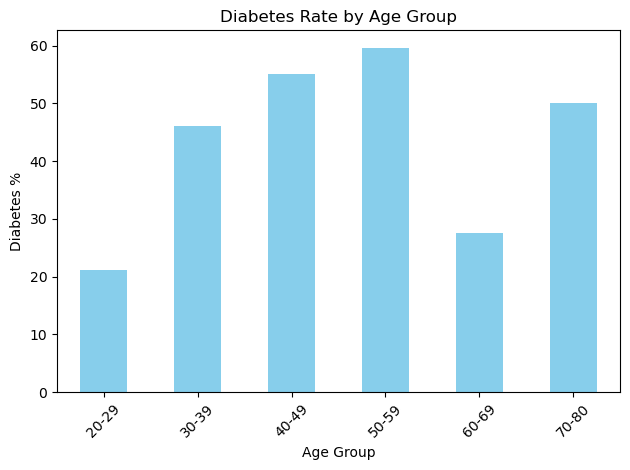

In [71]:
import matplotlib.pyplot as plt

age_group_diabetes.plot(kind='bar', color='skyblue')
plt.title('Diabetes Rate by Age Group')
plt.ylabel('Diabetes %')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()